# **Computational Drug Discovery - Exploratory Data Analysis**

In **Part 2**, I will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Load bioactivity data**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/SGLT2_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL183937,Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(O[C@@H]2O[C@H...,11.00,active
1,CHEMBL371448,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,491.00,active
2,CHEMBL382302,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,458.00,active
3,CHEMBL382319,CCc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,532.00,active
4,CHEMBL200608,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,754.00,active
...,...,...,...,...
1293,CHEMBL5177502,OC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3ccc(OC4CCOC4)cc3...,3.10,active
1294,CHEMBL5202047,CCOc1ccc(Cc2cc([C@H]3O[C@@H](SC)[C@H](O)[C@@H]...,1.80,active
1295,CHEMBL5182632,COc1ccc(Cc2cc([C@H]3O[C@@H](SC)[C@H](O)[C@@H](...,2.10,active
1296,CHEMBL5205876,COc1ccc(Cc2cc3c(c([C@@H]4O[C@H](CO)[C@@H](O)[C...,7.44,active


In [3]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [4]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [5]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL183937,11.00,active,Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(O[C@@H]2O[C@H...
1,CHEMBL371448,491.00,active,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...
2,CHEMBL382302,458.00,active,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...
3,CHEMBL382319,532.00,active,CCc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...
4,CHEMBL200608,754.00,active,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...
...,...,...,...,...
1293,CHEMBL5177502,3.10,active,OC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3ccc(OC4CCOC4)cc3...
1294,CHEMBL5202047,1.80,active,CCOc1ccc(Cc2cc([C@H]3O[C@@H](SC)[C@H](O)[C@@H]...
1295,CHEMBL5182632,2.10,active,COc1ccc(Cc2cc([C@H]3O[C@@H](SC)[C@H](O)[C@@H](...
1296,CHEMBL5205876,7.44,active,COc1ccc(Cc2cc3c(c([C@@H]4O[C@H](CO)[C@@H](O)[C...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [6]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [7]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

# This function takes SMILES notation which is used to translate a chemical's 3D structure into a string of symbols that computer software's can understand.

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [8]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,458.463,1.44102,5.0,9.0
1,454.479,1.58142,5.0,8.0
2,456.495,0.77012,5.0,8.0
3,470.522,1.02410,5.0,8.0
4,470.522,0.78052,4.0,9.0
...,...,...,...,...
1293,450.915,1.61340,4.0,7.0
1294,424.946,3.17260,3.0,6.0
1295,410.919,2.78250,3.0,6.0
1296,400.471,1.28960,4.0,6.0


### **Combine dataframes**

Let's take a look at the two dataframes that will be combined.

In [9]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,458.463,1.44102,5.0,9.0
1,454.479,1.58142,5.0,8.0
2,456.495,0.77012,5.0,8.0
3,470.522,1.02410,5.0,8.0
4,470.522,0.78052,4.0,9.0
...,...,...,...,...
1293,450.915,1.61340,4.0,7.0
1294,424.946,3.17260,3.0,6.0
1295,410.919,2.78250,3.0,6.0
1296,400.471,1.28960,4.0,6.0


In [10]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL183937,Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(O[C@@H]2O[C@H...,11.00,active
1,CHEMBL371448,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,491.00,active
2,CHEMBL382302,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,458.00,active
3,CHEMBL382319,CCc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,532.00,active
4,CHEMBL200608,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,754.00,active
...,...,...,...,...
1293,CHEMBL5177502,OC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3ccc(OC4CCOC4)cc3...,3.10,active
1294,CHEMBL5202047,CCOc1ccc(Cc2cc([C@H]3O[C@@H](SC)[C@H](O)[C@@H]...,1.80,active
1295,CHEMBL5182632,COc1ccc(Cc2cc([C@H]3O[C@@H](SC)[C@H](O)[C@@H](...,2.10,active
1296,CHEMBL5205876,COc1ccc(Cc2cc3c(c([C@@H]4O[C@H](CO)[C@@H](O)[C...,7.44,active


Combining the two dataframes:

In [11]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [12]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL183937,Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(O[C@@H]2O[C@H...,11.00,active,458.463,1.44102,5.0,9.0
1,CHEMBL371448,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,491.00,active,454.479,1.58142,5.0,8.0
2,CHEMBL382302,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,458.00,active,456.495,0.77012,5.0,8.0
3,CHEMBL382319,CCc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,532.00,active,470.522,1.02410,5.0,8.0
4,CHEMBL200608,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,754.00,active,470.522,0.78052,4.0,9.0
...,...,...,...,...,...,...,...,...
1293,CHEMBL5177502,OC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3ccc(OC4CCOC4)cc3...,3.10,active,450.915,1.61340,4.0,7.0
1294,CHEMBL5202047,CCOc1ccc(Cc2cc([C@H]3O[C@@H](SC)[C@H](O)[C@@H]...,1.80,active,424.946,3.17260,3.0,6.0
1295,CHEMBL5182632,COc1ccc(Cc2cc([C@H]3O[C@@H](SC)[C@H](O)[C@@H](...,2.10,active,410.919,2.78250,3.0,6.0
1296,CHEMBL5205876,COc1ccc(Cc2cc3c(c([C@@H]4O[C@H](CO)[C@@H](O)[C...,7.44,active,400.471,1.28960,4.0,6.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, I will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a dataframe as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [13]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis = 1)
        
    return x

*Note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.*

In [14]:
df_combined.standard_value.describe()

count       1298.000000
mean        2814.935992
std        29914.058779
min            0.300000
25%            2.585000
50%           18.800000
75%          163.800000
max      1000000.000000
Name: standard_value, dtype: float64

In [15]:
-np.log10( (10**-9)* 100000000 )

1.0

In [16]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [17]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis = 1)
        
    return x

I will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [18]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL183937,Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(O[C@@H]2O[C@H...,active,458.463,1.44102,5.0,9.0,11.00
1,CHEMBL371448,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,active,454.479,1.58142,5.0,8.0,491.00
2,CHEMBL382302,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,active,456.495,0.77012,5.0,8.0,458.00
3,CHEMBL382319,CCc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,active,470.522,1.02410,5.0,8.0,532.00
4,CHEMBL200608,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,active,470.522,0.78052,4.0,9.0,754.00
...,...,...,...,...,...,...,...,...
1293,CHEMBL5177502,OC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3ccc(OC4CCOC4)cc3...,active,450.915,1.61340,4.0,7.0,3.10
1294,CHEMBL5202047,CCOc1ccc(Cc2cc([C@H]3O[C@@H](SC)[C@H](O)[C@@H]...,active,424.946,3.17260,3.0,6.0,1.80
1295,CHEMBL5182632,COc1ccc(Cc2cc([C@H]3O[C@@H](SC)[C@H](O)[C@@H](...,active,410.919,2.78250,3.0,6.0,2.10
1296,CHEMBL5205876,COc1ccc(Cc2cc3c(c([C@@H]4O[C@H](CO)[C@@H](O)[C...,active,400.471,1.28960,4.0,6.0,7.44


In [19]:
df_norm.standard_value_norm.describe()

count       1298.000000
mean        2814.935992
std        29914.058779
min            0.300000
25%            2.585000
50%           18.800000
75%          163.800000
max      1000000.000000
Name: standard_value_norm, dtype: float64

In [20]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL183937,Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(O[C@@H]2O[C@H...,active,458.463,1.44102,5.0,9.0,7.958607
1,CHEMBL371448,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,active,454.479,1.58142,5.0,8.0,6.308919
2,CHEMBL382302,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,active,456.495,0.77012,5.0,8.0,6.339135
3,CHEMBL382319,CCc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,active,470.522,1.02410,5.0,8.0,6.274088
4,CHEMBL200608,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,active,470.522,0.78052,4.0,9.0,6.122629
...,...,...,...,...,...,...,...,...
1293,CHEMBL5177502,OC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3ccc(OC4CCOC4)cc3...,active,450.915,1.61340,4.0,7.0,8.508638
1294,CHEMBL5202047,CCOc1ccc(Cc2cc([C@H]3O[C@@H](SC)[C@H](O)[C@@H]...,active,424.946,3.17260,3.0,6.0,8.744727
1295,CHEMBL5182632,COc1ccc(Cc2cc([C@H]3O[C@@H](SC)[C@H](O)[C@@H](...,active,410.919,2.78250,3.0,6.0,8.677781
1296,CHEMBL5205876,COc1ccc(Cc2cc3c(c([C@@H]4O[C@H](CO)[C@@H](O)[C...,active,400.471,1.28960,4.0,6.0,8.128427


In [21]:
df_final.pIC50.describe()

count    1298.000000
mean        7.530706
std         1.238352
min         3.000000
25%         6.785687
50%         7.725842
75%         8.587542
max         9.522879
Name: pIC50, dtype: float64

In [42]:
df_final.to_csv('../data/SGLT2_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, I will be removing the ``intermediate`` class from the dataset to allow for simpler comparison.

In [23]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL183937,Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(O[C@@H]2O[C@H...,active,458.463,1.44102,5.0,9.0,7.958607
1,CHEMBL371448,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,active,454.479,1.58142,5.0,8.0,6.308919
2,CHEMBL382302,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,active,456.495,0.77012,5.0,8.0,6.339135
3,CHEMBL382319,CCc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,active,470.522,1.02410,5.0,8.0,6.274088
4,CHEMBL200608,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,active,470.522,0.78052,4.0,9.0,6.122629
...,...,...,...,...,...,...,...,...
1293,CHEMBL5177502,OC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3ccc(OC4CCOC4)cc3...,active,450.915,1.61340,4.0,7.0,8.508638
1294,CHEMBL5202047,CCOc1ccc(Cc2cc([C@H]3O[C@@H](SC)[C@H](O)[C@@H]...,active,424.946,3.17260,3.0,6.0,8.744727
1295,CHEMBL5182632,COc1ccc(Cc2cc([C@H]3O[C@@H](SC)[C@H](O)[C@@H](...,active,410.919,2.78250,3.0,6.0,8.677781
1296,CHEMBL5205876,COc1ccc(Cc2cc3c(c([C@@H]4O[C@H](CO)[C@@H](O)[C...,active,400.471,1.28960,4.0,6.0,8.128427


In [41]:
df_2class.to_csv('../data/SLGT2_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [25]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [26]:
palette = ['darkseagreen', 'lightcoral']

### **Frequency plot of the 2 bioactivity classes**

/var/folders/0b/t44sb5395fz_lr8c2gy7h3h80000gn/T/ipykernel_15401/1347909514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_2class, edgecolor='black', palette = palette)


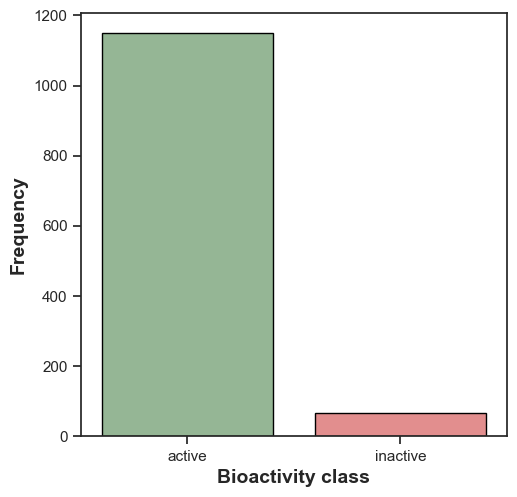

In [27]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black', palette = palette)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('../plots/plot_bioactivity_class.png')

### **Scatter plot of MW versus LogP**

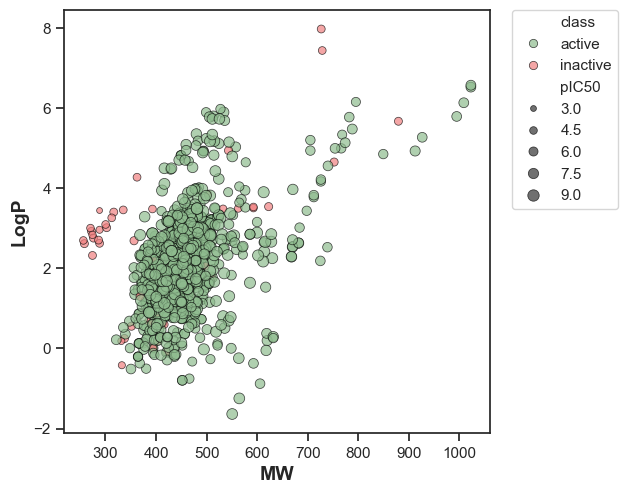

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7, palette = palette)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('../plots/plot_MW_vs_LogP.png')

It can be seen that the active bioactivity class spans more chemical space than the inactive bioactivity class as evident by the scatter plot of MW vs LogP.

### **Box plots of each Lipinski descriptor**

#### **1) pIC50 value**

/var/folders/0b/t44sb5395fz_lr8c2gy7h3h80000gn/T/ipykernel_15401/2754408176.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'pIC50', data = df_2class, palette = palette)


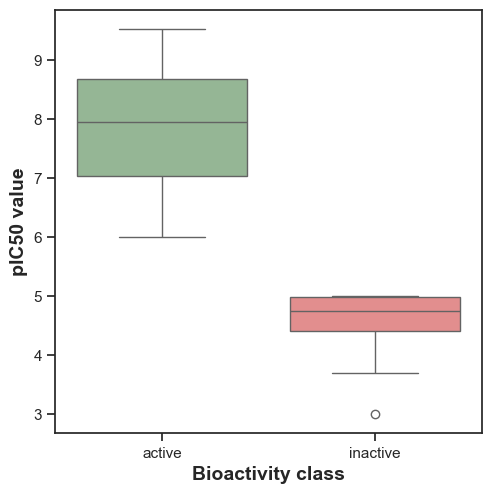

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class, palette = palette)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('../plots/plot_ic50.png')

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL183937,Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(O[C@@H]2O[C@H...,active,458.463,1.44102,5.0,9.0,7.958607
1,CHEMBL371448,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,active,454.479,1.58142,5.0,8.0,6.308919
2,CHEMBL382302,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,active,456.495,0.77012,5.0,8.0,6.339135
3,CHEMBL382319,CCc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,active,470.522,1.02410,5.0,8.0,6.274088
4,CHEMBL200608,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,active,470.522,0.78052,4.0,9.0,6.122629
...,...,...,...,...,...,...,...,...
1293,CHEMBL5177502,OC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3ccc(OC4CCOC4)cc3...,active,450.915,1.61340,4.0,7.0,8.508638
1294,CHEMBL5202047,CCOc1ccc(Cc2cc([C@H]3O[C@@H](SC)[C@H](O)[C@@H]...,active,424.946,3.17260,3.0,6.0,8.744727
1295,CHEMBL5182632,COc1ccc(Cc2cc([C@H]3O[C@@H](SC)[C@H](O)[C@@H](...,active,410.919,2.78250,3.0,6.0,8.677781
1296,CHEMBL5205876,COc1ccc(Cc2cc3c(c([C@@H]4O[C@H](CO)[C@@H](O)[C...,active,400.471,1.28960,4.0,6.0,8.128427


**Statistical analysis | Mann-Whitney U Test**

The Mann-Whitney U test evaluates the statistical significance of the difference between active and inactive bioactivity classes.

In [30]:
def mannwhitney(descriptor, verbose=False):
  # Modified from https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [31]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,75900.0,1.367120e-42,0.05,Different distribution (reject H0)


#### **2) MW**

/var/folders/0b/t44sb5395fz_lr8c2gy7h3h80000gn/T/ipykernel_15401/2397871116.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'MW', data = df_2class, palette = palette)


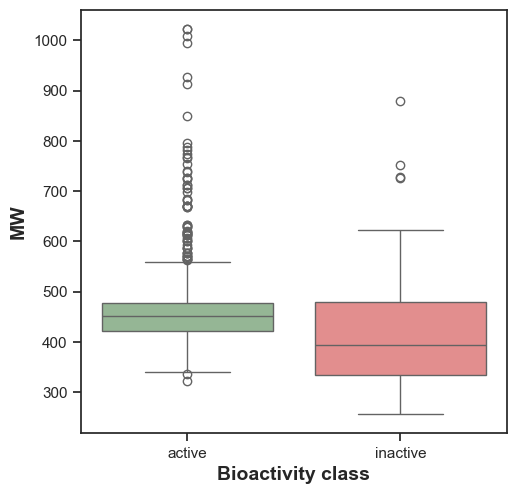

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class, palette = palette)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('../plots/plot_MW.png')

In [33]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,50897.0,0.000003,0.05,Different distribution (reject H0)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL183937,Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(O[C@@H]2O[C@H...,active,458.463,1.44102,5.0,9.0,7.958607
1,CHEMBL371448,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,active,454.479,1.58142,5.0,8.0,6.308919
2,CHEMBL382302,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,active,456.495,0.77012,5.0,8.0,6.339135
3,CHEMBL382319,CCc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,active,470.522,1.02410,5.0,8.0,6.274088
4,CHEMBL200608,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,active,470.522,0.78052,4.0,9.0,6.122629
...,...,...,...,...,...,...,...,...
1293,CHEMBL5177502,OC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3ccc(OC4CCOC4)cc3...,active,450.915,1.61340,4.0,7.0,8.508638
1294,CHEMBL5202047,CCOc1ccc(Cc2cc([C@H]3O[C@@H](SC)[C@H](O)[C@@H]...,active,424.946,3.17260,3.0,6.0,8.744727
1295,CHEMBL5182632,COc1ccc(Cc2cc([C@H]3O[C@@H](SC)[C@H](O)[C@@H](...,active,410.919,2.78250,3.0,6.0,8.677781
1296,CHEMBL5205876,COc1ccc(Cc2cc3c(c([C@@H]4O[C@H](CO)[C@@H](O)[C...,active,400.471,1.28960,4.0,6.0,8.128427


#### **3) LogP**

/var/folders/0b/t44sb5395fz_lr8c2gy7h3h80000gn/T/ipykernel_15401/179447754.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'LogP', data = df_2class, palette = palette)


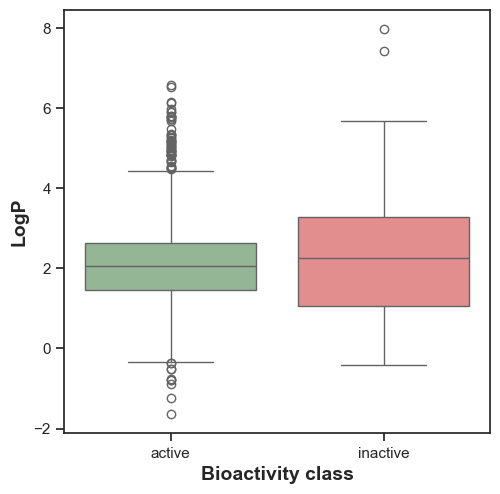

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class, palette = palette)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('../plots/plot_LogP.png')

**Statistical analysis | Mann-Whitney U Test**

In [35]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,35363.0,0.351202,0.05,Same distribution (fail to reject H0)


#### **4) NumHDonors**

/var/folders/0b/t44sb5395fz_lr8c2gy7h3h80000gn/T/ipykernel_15401/1596860469.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, palette = palette)


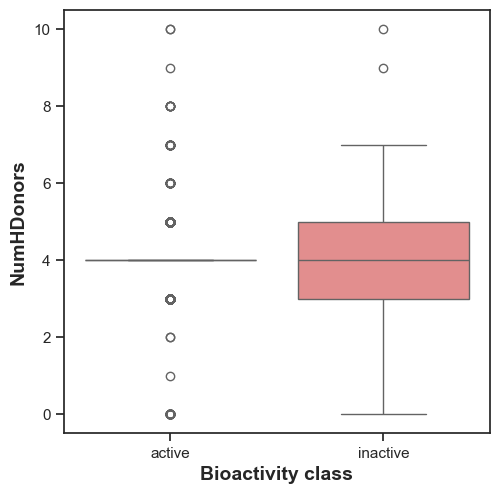

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, palette = palette)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('../plots/plot_NumHDonors.png')

**Statistical analysis | Mann-Whitney U Test**

In [37]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,42092.0,0.087438,0.05,Same distribution (fail to reject H0)


#### **5) NumHAcceptors**

/var/folders/0b/t44sb5395fz_lr8c2gy7h3h80000gn/T/ipykernel_15401/2277621025.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, palette = palette)


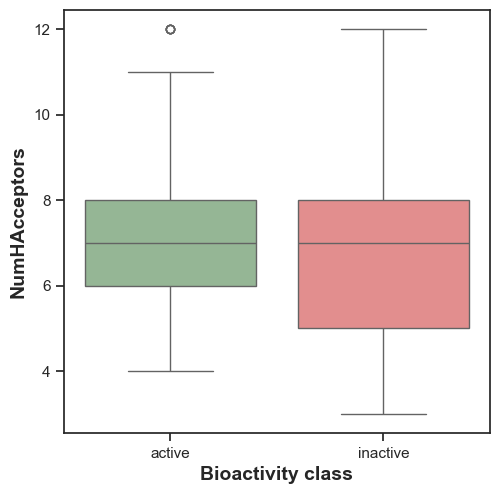

In [38]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, palette = palette)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('../plots/plot_NumHAcceptors.png')

In [39]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,40840.0,0.284765,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

#### **Box Plots**

##### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***significant statistical difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

##### **Lipinski's descriptors**

Only of 2 of the 4 Lipinski's descriptors (``MW`` and ``LogP``) exhibited ***significant statistical difference*** between the **actives** and **inactives**. 

The number of hydrogen bond donors and acceptors (``NumHDonors`` and ``NumHAcceptors``) did not exhibit statistical significance.

## **Zip files**

In [40]:
! zip -r results.zip . -i *.csv *.png

updating: SGLT2_04_bioactivity_data_3class_pIC50.csv (deflated 80%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
updating: mannwhitneyu_NumHDonors.csv (deflated 11%)
updating: mannwhitneyu_MW.csv (deflated 8%)
updating: SLGT2_05_bioactivity_data_2class_pIC50.csv (deflated 80%)
updating: mannwhitneyu_pIC50.csv (deflated 10%)
updating: mannwhitneyu_LogP.csv (deflated 8%)
  adding: SGLT2_06_bioactivity_data_3class_pIC50_pubchem_fp.csv (deflated 96%)
